# <font color='#ff0000'>PCA - WINE DATASET

## <font color='#0000ff'> Problem Statement

## <font color='#009999'>Perform Principal component analysis and perform clustering using first 3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain optimum number of clusters and check whether we have obtained same number of clusters with the original data (class column we have ignored at the begining who shows it has 3 clusters)df


In [1]:
## import the required libraries
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 

from sklearn.cluster import KMeans

from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


In [2]:
wine_data = pd.read_csv("wine.csv")
wine_data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
wine_data.shape

(178, 14)

In [4]:
wine_data.Type.unique()

array([1, 2, 3], dtype=int64)

In [5]:
## Dropping the type column and creating a new dataset
wine1_data = wine_data.drop("Type",axis=1)
wine1_data

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [6]:
## Checking the basic informations about the dataset
wine1_data.shape

(178, 13)

In [7]:
wine1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [8]:
wine1_data.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [9]:
wine1_data[wine1_data.duplicated(keep = False)]

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline


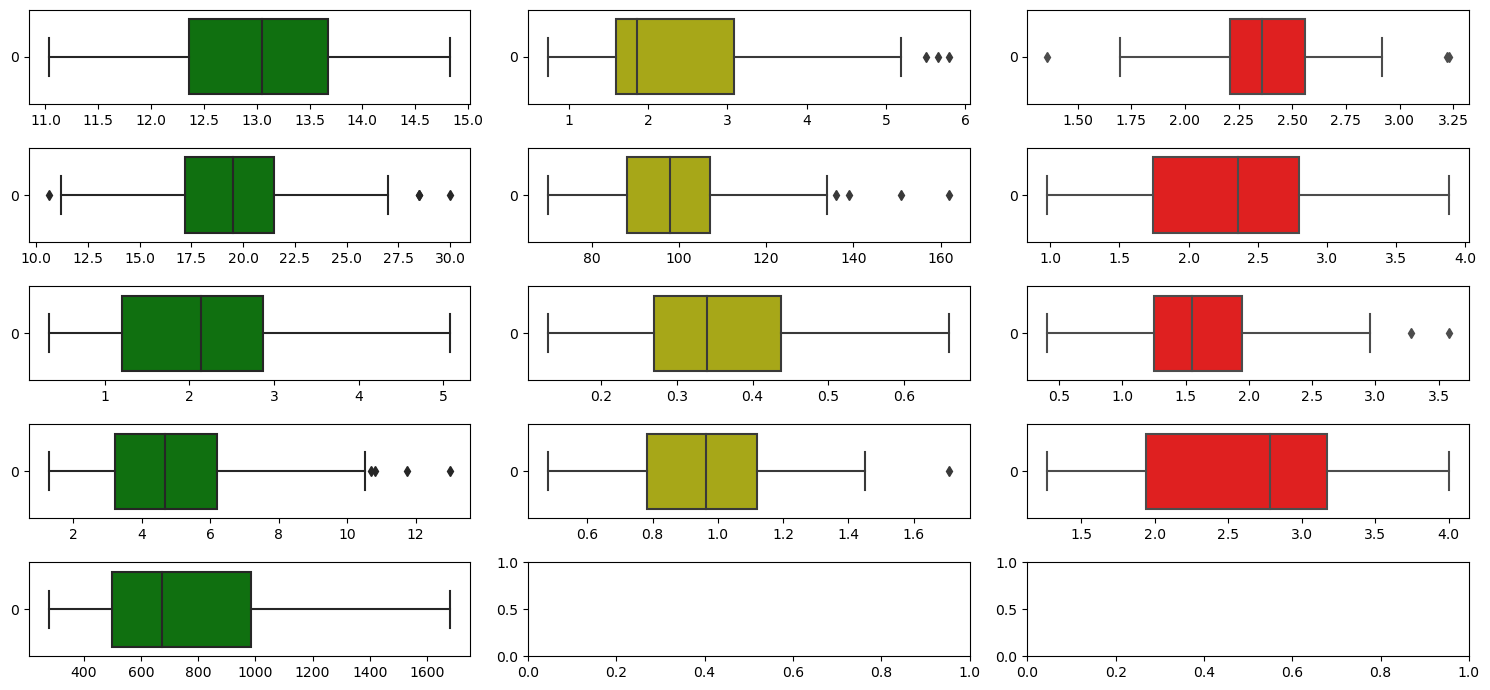

In [10]:
## to check the outliers by using the boxplot
fig, ax = plt.subplots(5, 3, figsize=(15,7))
sns.boxplot(wine1_data.Alcohol,ax=ax[0,0],color='g',orient='h')
sns.boxplot(wine1_data.Malic,ax=ax[0,1],color='y',orient='h')
sns.boxplot(wine1_data.Ash,ax=ax[0,2],color='r',orient='h')
sns.boxplot(wine1_data.Alcalinity,ax=ax[1,0],color='g',orient='h')
sns.boxplot(wine1_data.Magnesium,ax=ax[1,1],color='y',orient='h')
sns.boxplot(wine1_data.Phenols,ax=ax[1,2],color='r',orient='h')
sns.boxplot(wine1_data.Flavanoids,ax=ax[2,0],color='g',orient='h')
sns.boxplot(wine1_data.Nonflavanoids,ax=ax[2,1],color='y',orient='h')
sns.boxplot(wine1_data.Proanthocyanins,ax=ax[2,2],color='r',orient='h')
sns.boxplot(wine1_data.Color,ax=ax[3,0],color='g',orient='h')
sns.boxplot(wine1_data.Hue,ax=ax[3,1],color='y',orient='h')
sns.boxplot(wine1_data.Dilution,ax=ax[3,2],color='r',orient='h')
sns.boxplot(wine1_data.Proline, ax=ax[4,0],color='g',orient='h')
plt.tight_layout()
plt.show()

In [11]:
###Cheking if the data is normally distributed using distplot

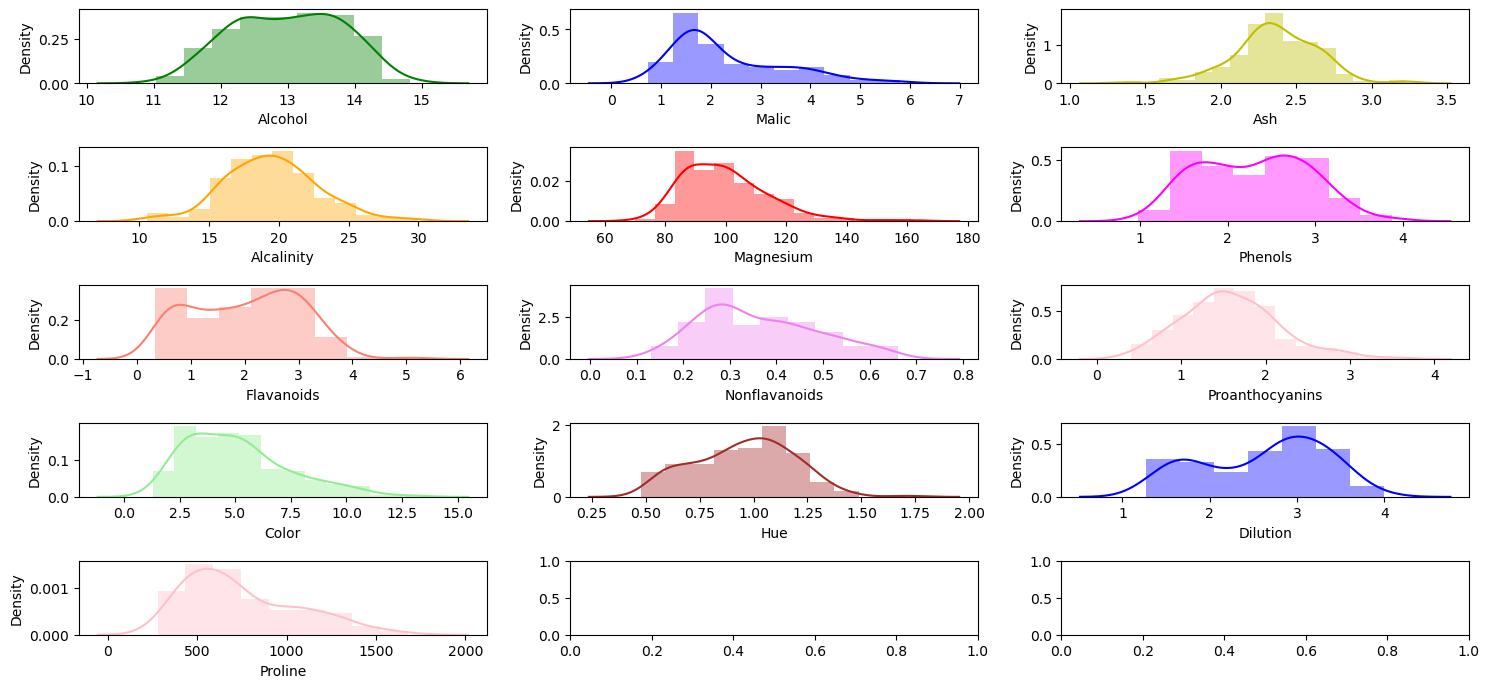

In [12]:
fig, ax = plt.subplots(5, 3, figsize=(15,7))
sns.distplot(wine1_data.Alcohol,ax=ax[0,0],color='g')
sns.distplot(wine1_data.Malic,ax=ax[0,1],color='b')
sns.distplot(wine1_data.Ash,ax=ax[0,2],color='y')
sns.distplot(wine1_data.Alcalinity,ax=ax[1,0],color='orange')
sns.distplot(wine1_data.Magnesium,ax=ax[1,1],color='r')
sns.distplot(wine1_data.Phenols,ax=ax[1,2],color='magenta')
sns.distplot(wine1_data.Flavanoids,ax=ax[2,0],color='salmon')
sns.distplot(wine1_data.Nonflavanoids,ax=ax[2,1],color='violet')
sns.distplot(wine1_data.Proanthocyanins,ax=ax[2,2],color='pink')
sns.distplot(wine1_data.Color,ax=ax[3,0],color='lightgreen')
sns.distplot(wine1_data.Hue,ax=ax[3,1],color='brown')
sns.distplot(wine1_data.Dilution,ax=ax[3,2],color='b')
sns.distplot(wine1_data.Proline,ax=ax[4,0],color='pink')
plt.tight_layout()
plt.show()

In [13]:
###Normalizing the values for better result

In [14]:
wine1_normal = scale(wine1_data)

In [15]:
wine1_normal

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

## Clustering methods

### creating a hierarchical cluster using different types of linkage method

### 1)Simple average linkage method

Text(0.5, 1.0, 'Dendrogram')

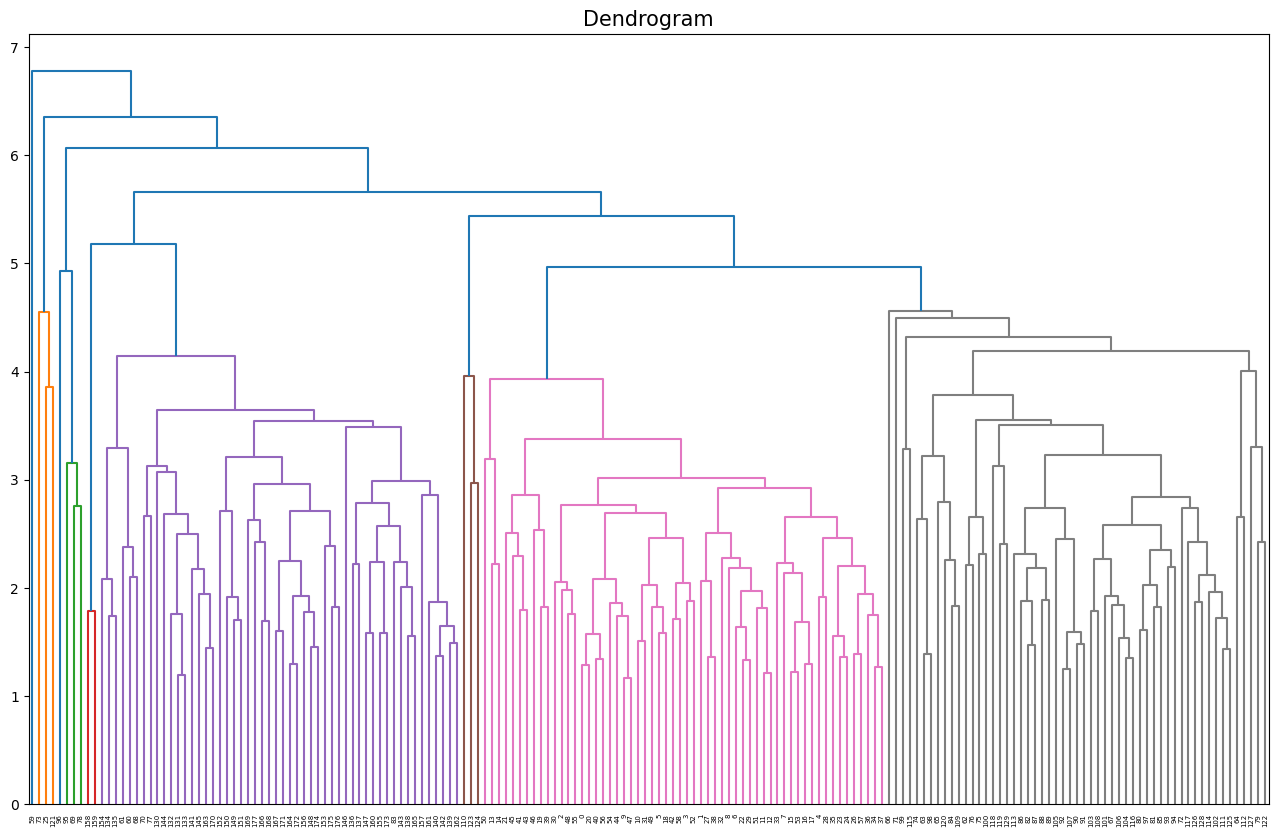

In [16]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(wine1_normal, method='average'))
plt.title("Dendrogram",size=15)

In [17]:
hc1 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')

### Model fitting

In [18]:
y_hc1 = hc1.fit_predict(wine1_normal)
Clusters=pd.DataFrame(y_hc1,columns=['Clusters'])
wine_data['cluster'] = y_hc1

In [19]:
wine_data.groupby('cluster').agg(['mean']).reset_index()

,cluster,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1.500000,13.003879,1.996207,2.343017,18.665517,97.612069,2.568448,2.572069,0.322672,1.776379,4.27931,1.058879,3.017672,802.732759
1,1,2.888889,13.090185,3.181111,2.414815,21.087037,99.592593,1.697222,0.837778,0.455556,1.126852,6.99463,0.717148,1.710185,629.629630
2,2,1.666667,12.533333,1.923333,3.016667,27.833333,127.333333,3.036667,3.550000,0.383333,1.916667,4.31000,1.123333,3.463333,760.000000
3,3,2.000000,12.370000,0.940000,1.360000,10.600000,88.000000,1.980000,0.570000,0.280000,0.420000,1.95000,1.050000,1.820000,520.000000
4,4,2.000000,12.205000,1.455000,2.160000,18.025000,145.750000,1.962500,1.597500,0.237500,2.525000,2.83750,1.112500,2.567500,757.500000


### checking no.of members in each clusters

In [20]:
for i in range(5):
    print("cluster", i)
    print("Total Members:", len(list(wine_data[wine_data['cluster'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 116

cluster 1
Total Members: 54

cluster 2
Total Members: 3

cluster 3
Total Members: 1

cluster 4
Total Members: 4



### 2)Complete linakge method

Text(0.5, 1.0, 'Dendrogram')

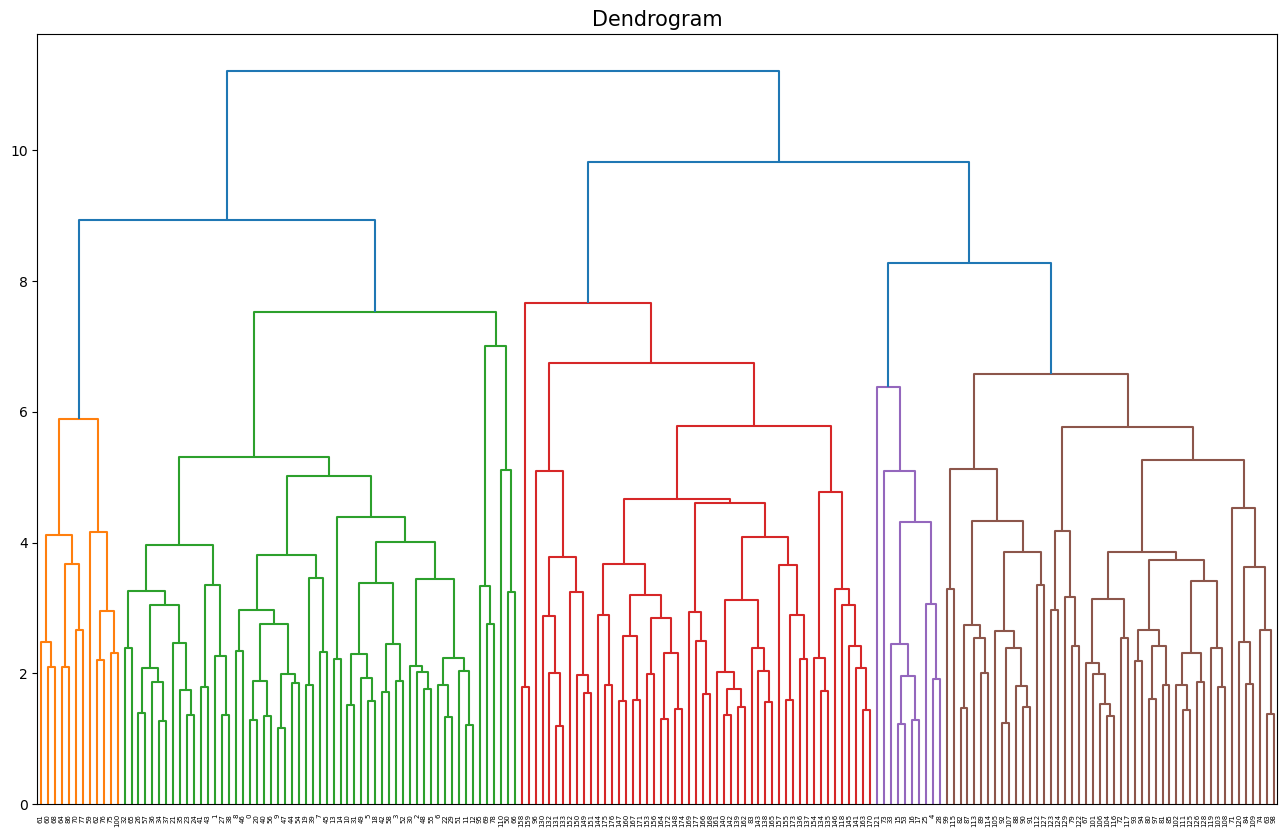

In [21]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(wine1_normal, method='complete'))
plt.title("Dendrogram",size=15)

In [22]:
hc2 = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

### Fitting the model

In [23]:
y_hc2 = hc2.fit_predict(wine1_normal)
Clusters=pd.DataFrame(y_hc2,columns=['Clusters'])

In [24]:
##Creating a clustering column in the dataset with containing the clusters from the first method

In [25]:
wine_data['cluster'] = y_hc2

In [26]:
## Grouping the clusters and checking their means
wine_data.groupby('cluster').agg(['mean']).reset_index()

,cluster,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1.862069,12.415172,1.989828,2.381379,21.117241,93.844828,2.424828,2.339828,0.366897,1.678103,3.280345,1.057931,2.978448,573.379310
1,1,1.105263,13.604211,1.982807,2.360526,16.652632,106.368421,2.797719,2.920175,0.274386,2.015088,5.326667,1.051579,3.141228,1073.052632
2,2,2.941176,13.117843,3.322157,2.431765,21.333333,99.333333,1.675686,0.810588,0.444314,1.164314,7.170980,0.691373,1.709804,622.490196
3,3,2.000000,12.465000,1.500833,2.045833,17.341667,98.500000,1.913333,1.475833,0.402500,0.967500,3.395000,1.155500,2.156667,565.000000


In [27]:
#checking the no.of members in each clusters

In [28]:
for i in range(4):
    print("cluster", i)
    print("Total Members:", len(list(wine_data[wine_data['cluster'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 58

cluster 1
Total Members: 57

cluster 2
Total Members: 51

cluster 3
Total Members: 12



### 3) Centroid (ward) linakge method

Text(0.5, 1.0, 'Dendrogram')

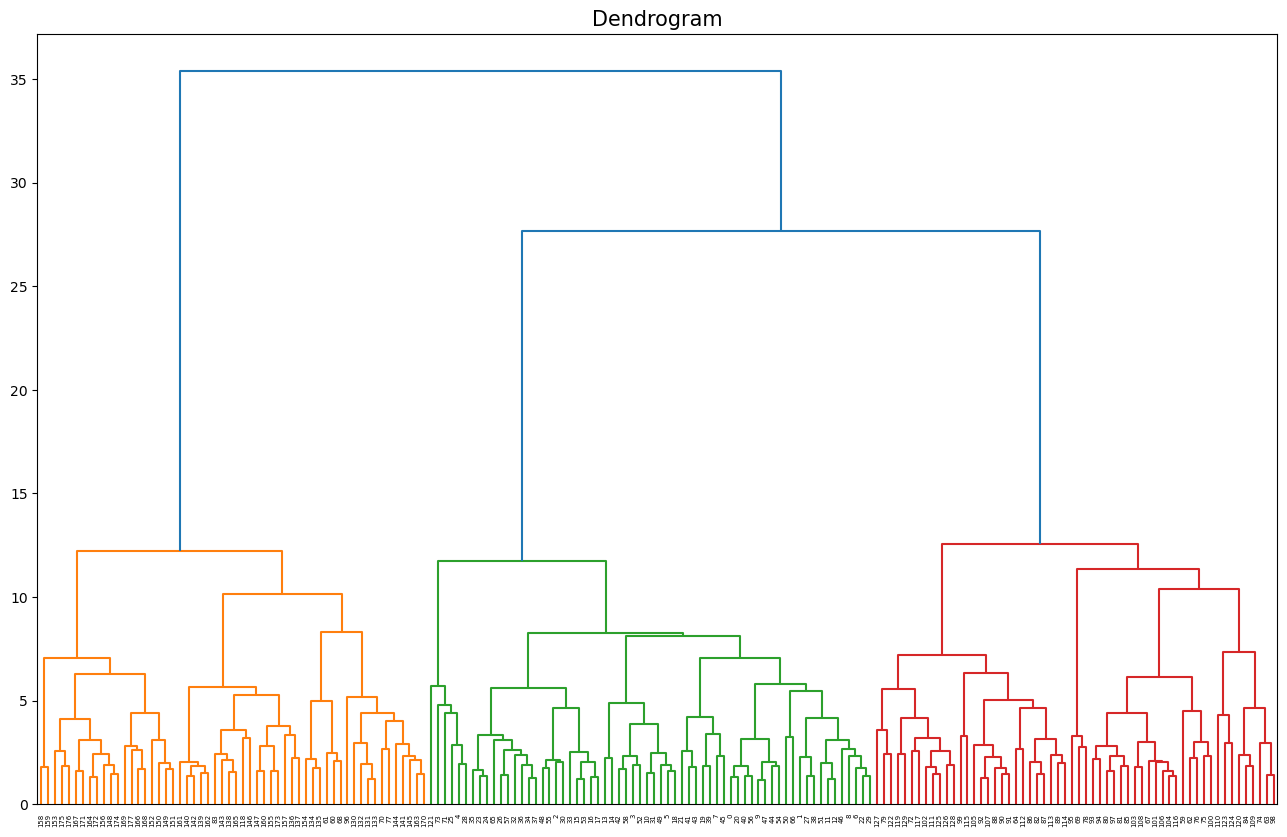

In [29]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(wine1_normal, method='ward'))
plt.title("Dendrogram",size=15)

In [30]:
hc3 = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')

In [31]:
### Fitting the model

In [32]:
y_hc3 = hc3.fit_predict(wine1_normal)
Clusters=pd.DataFrame(y_hc3,columns=['Clusters'])

In [33]:
## Creating a new cluster column with new hierarchial clustering categories

In [34]:
wine_data['cluster'] = y_hc3

In [35]:
wine_data.groupby('cluster').agg(['mean']).reset_index()

,cluster,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2.000000,12.203966,1.938966,2.215172,20.208621,92.551724,2.262931,2.088103,0.355345,1.686552,2.895345,1.060000,2.862241,501.431034
1,1,2.857143,13.061607,3.166607,2.412857,21.003571,99.857143,1.694286,0.847857,0.449464,1.129286,6.850179,0.721000,1.727321,624.946429
2,2,1.078125,13.669219,1.970000,2.463125,17.528125,106.156250,2.850000,3.009688,0.291094,1.908125,5.450000,1.071406,3.158437,1076.046875


In [36]:
for i in range(3):
    print("cluster", i)
    print("Total Members:", len(list(wine_data[wine_data['cluster'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 58

cluster 1
Total Members: 56

cluster 2
Total Members: 64



### 4)single linkage method

Text(0.5, 1.0, 'Dendrogram')

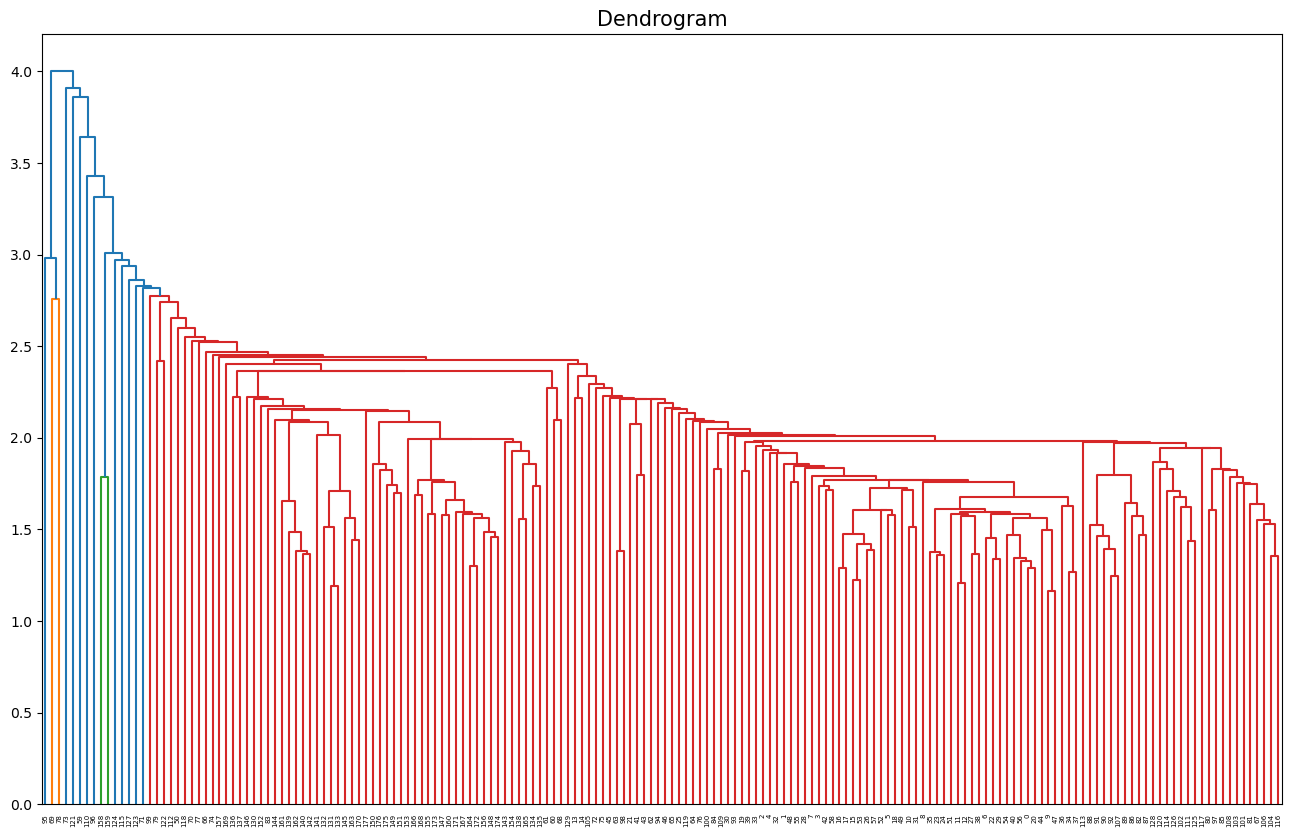

In [37]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(wine1_normal, method='single'))
plt.title("Dendrogram",size=15)

In [38]:
hc4 = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'single')

#### Model fitting

In [39]:
y_hc4 = hc4.fit_predict(wine1_normal)
Clusters=pd.DataFrame(y_hc4,columns=['Clusters'])
wine_data['cluster'] = y_hc4

In [40]:
wine_data.groupby('cluster').agg(['mean']).reset_index()

,cluster,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1.937143,13.012000,2.355257,2.373371,19.540000,98.885714,2.298743,2.0332,0.363429,1.569371,5.094229,0.953863,2.610686,745.954286
1,1,2.000000,12.336667,1.233333,1.966667,16.866667,149.666667,2.083333,1.8000,0.270000,2.846667,2.950000,1.166667,2.670000,801.666667


In [41]:
### checking the no. of elements in the clusters

In [42]:
for i in range(2):
    print("cluster", i)
    print("Total Members:", len(list(wine_data[wine_data['cluster'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 175

cluster 1
Total Members: 3



## Kmeans clustering

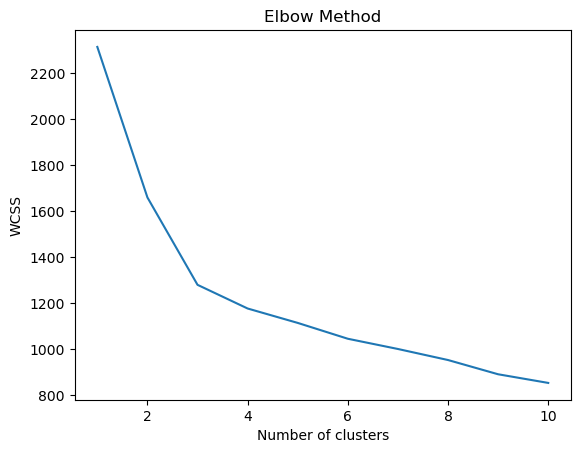

In [43]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(wine1_normal)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [44]:
##Creating 3 clusters based on the elbow method

In [45]:
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(wine1_normal)

KMeans(n_clusters=3, random_state=42)

In [46]:
# Creating a variable with cluster labels for all the categories
KM_label=clusters_new.labels_

In [47]:
# Creating a new cluster column in with the  labels
wine_data['cluster'] = clusters_new.labels_

In [48]:
clusters_new.cluster_centers_

array([[ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529],
       [-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618]])

In [49]:
# Grouping and checking mean

In [50]:
wine_data.groupby('cluster').agg(['mean']).reset_index()

,cluster,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2.941176,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
1,1,1.048387,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806
2,2,2.000000,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231


In [51]:
## checking th no.of elements in the 3 clusters

In [52]:
for i in range(3):
    print("cluster", i)
    print("Total Members:", len(list(wine_data[wine_data['cluster'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 51

cluster 1
Total Members: 62

cluster 2
Total Members: 65



In [53]:
## Checking the silhouette score for each above method-To check the goodness of the clusters

In [54]:
SH_average=metrics.silhouette_score(wine1_normal,y_hc1)
SH_average

0.22945756295901437

In [55]:
SH_Ward=metrics.silhouette_score(wine1_normal,y_hc2)
SH_Ward

0.19382526203175696

In [56]:
SH_Complete=metrics.silhouette_score(wine1_normal,y_hc3)
SH_Complete

0.2774439826952265

In [57]:
SH_Single=metrics.silhouette_score(wine1_normal,y_hc4)
SH_Single

0.22245060727650925

In [58]:
SH_Kmeans=metrics.silhouette_score(wine1_normal,KM_label)
SH_Kmeans

0.2848589191898987

###  Consildating the results

In [59]:
t={'Model':pd.Series(['Hierarchial1','Hierarchial2','Hierarchial3','Hierarchial4','Kmeans']),
  'Silhouette score':[SH_average,SH_Ward,SH_Complete,SH_Single,SH_Kmeans]
  }
t=pd.DataFrame(t)
t

,Model,Silhouette score
0,Hierarchial1,0.229458
1,Hierarchial2,0.193825
2,Hierarchial3,0.277444
3,Hierarchial4,0.222451
4,Kmeans,0.284859


### PCA to the normalized data

In [60]:
pca = PCA()
pca_values = pca.fit_transform(wine1_normal)
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

### Applying PCA on the dataset

In [61]:
pca = PCA(n_components = 13)
pca_values = pca.fit_transform(wine1_normal)

In [62]:
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [63]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

In [64]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

### Plotting the cumulative variance

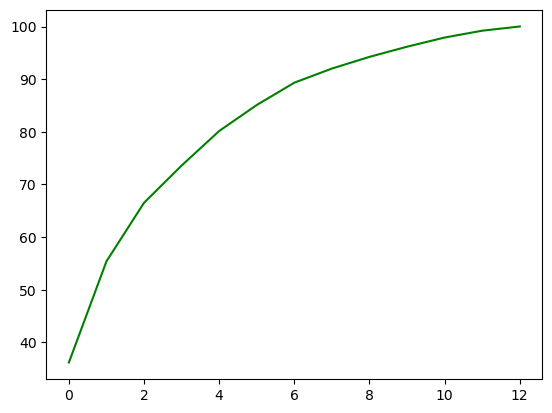

In [65]:
plt.plot(var1,color="g")

In [66]:
## Taking PC with just three components
wine_pca=pca_values[:,0:3]

### Now there are 3 principal components with that creating clusters with each linkage method and also creating kmeans clustering

### Single linkage method

Text(0.5, 1.0, 'Dendrogram')

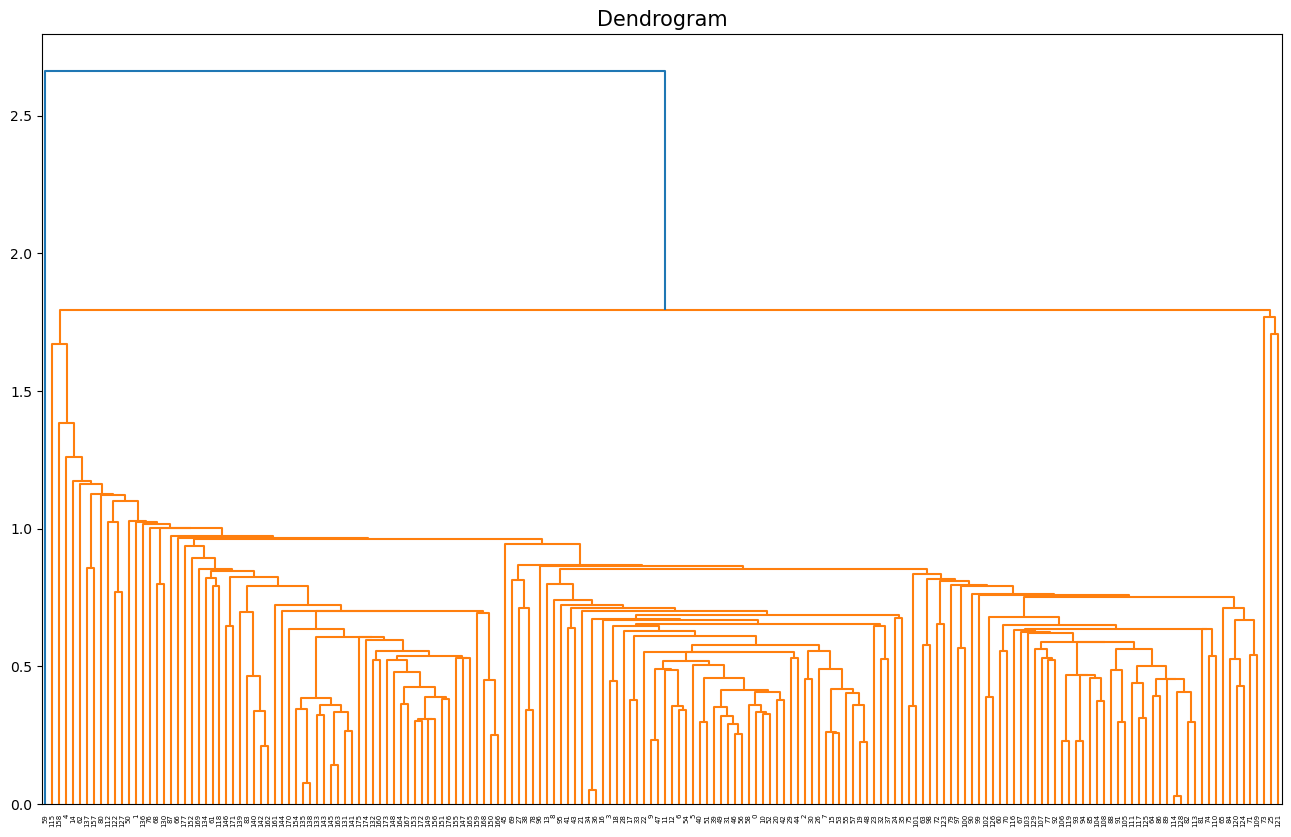

In [67]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(wine_pca, method='single'))
plt.title("Dendrogram",size=15)

In [68]:
hc1_pc = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'single')

In [69]:
y_hc1p = hc1_pc.fit_predict(wine_pca)
Clusters=pd.DataFrame(y_hc1p,columns=['Clusters'])

In [70]:
wine_data['cluster'] = y_hc1p

In [71]:
for i in range(2):
    print("cluster", i)
    print("Total Members:", len(list(wine_data[wine_data['cluster'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 177

cluster 1
Total Members: 1



### centroid(ward) linkage method

Text(0.5, 1.0, 'Dendrogram')

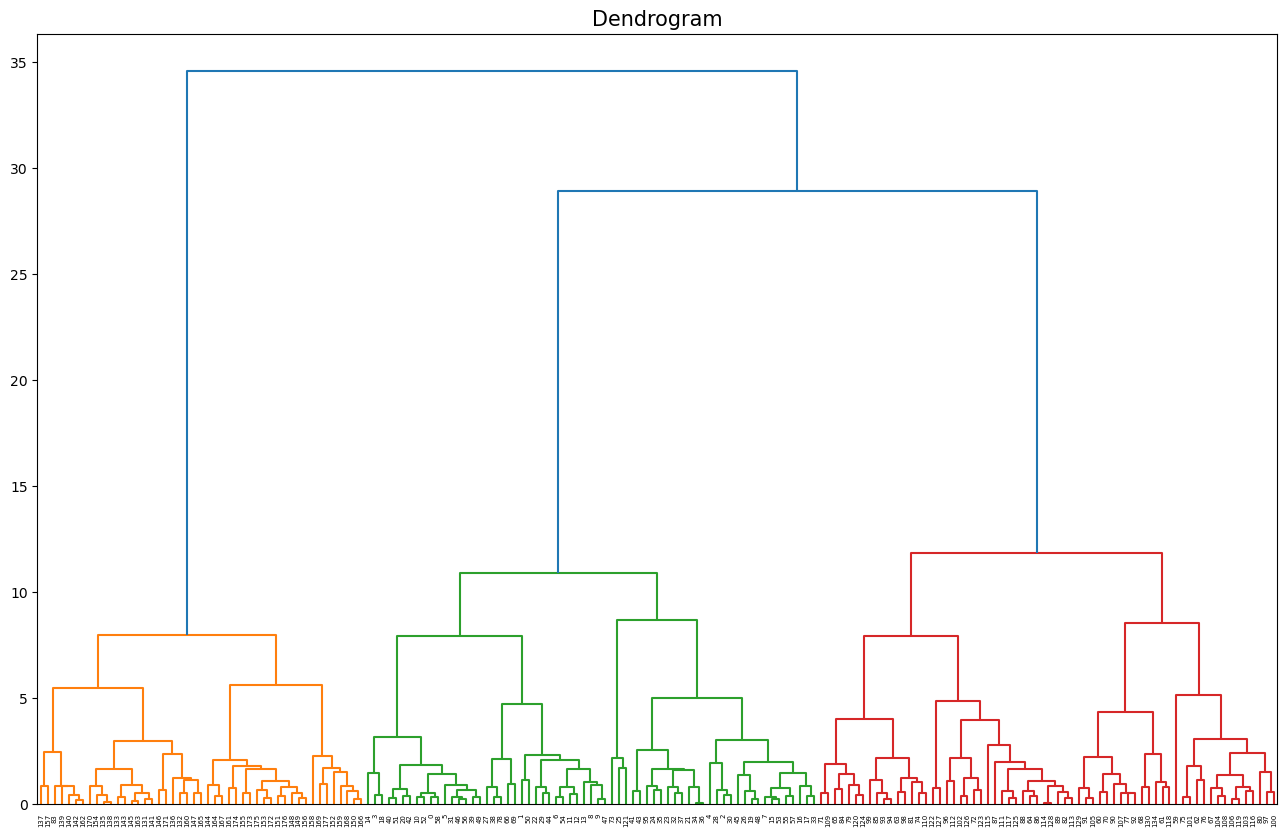

In [72]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(wine_pca, method='ward'))
plt.title("Dendrogram",size=15)

In [73]:
hc2_pc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')

#### Fitting model

In [74]:
y_hc2p = hc2_pc.fit_predict(wine_pca)
Clusters=pd.DataFrame(y_hc2p,columns=['Clusters'])
wine_data['cluster'] = y_hc2p

In [75]:
wine_data.groupby('cluster').agg(['mean']).reset_index()

,cluster,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2.030303,12.264242,1.932121,2.245455,20.087879,91.666667,2.220152,1.991364,0.367727,1.540455,3.036364,1.042515,2.729848,504.439394
1,1,2.978723,13.171489,3.431702,2.441064,21.595745,98.829787,1.674894,0.792979,0.452766,1.165957,7.452553,0.682979,1.702553,627.021277
2,2,1.092308,13.624769,1.954769,2.435538,17.373846,108.600000,2.819692,2.961692,0.290154,1.949385,5.379538,1.069538,3.149077,1079.753846


In [76]:
### Checking the no. of elements in each clusters

In [77]:
for i in range(3):
    print("cluster", i)
    print("Total Members:", len(list(wine_data[wine_data['cluster'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 66

cluster 1
Total Members: 47

cluster 2
Total Members: 65



### Applying average linkage method

Text(0.5, 1.0, 'Dendrogram')

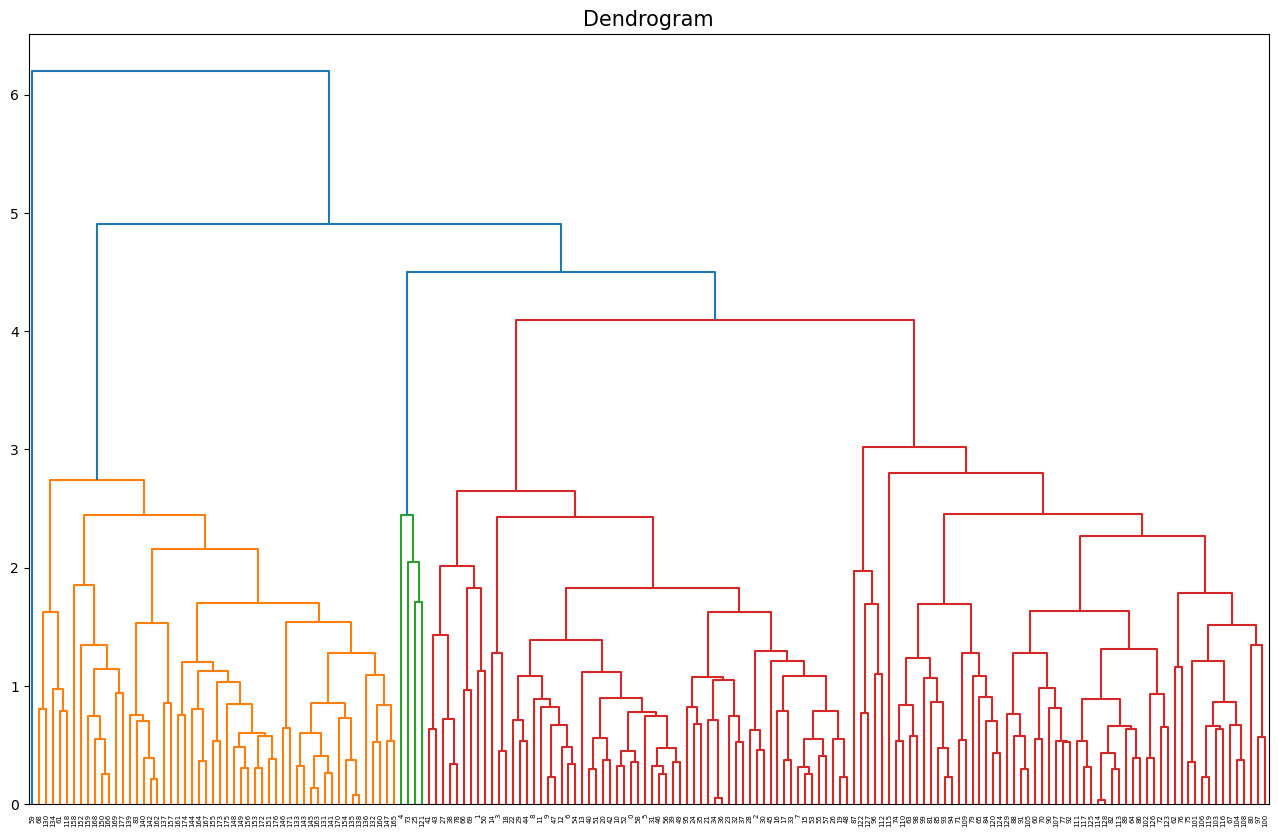

In [78]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(wine_pca, method='average'))
plt.title("Dendrogram",size=15)

In [79]:
hc3_pc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')

#### Fit the data on the model

In [80]:
y_hc3p = hc3_pc.fit_predict(wine_pca)
Clusters=pd.DataFrame(y_hc3p,columns=['Clusters'])

In [81]:
### Creating a new column cluster with the clustered labels

In [82]:
wine_data['cluster'] = y_hc3p
wine_data.groupby('cluster').agg(['mean']).reset_index()

,cluster,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2.000000,12.215833,1.971000,2.265167,20.498333,91.083333,2.247667,2.084500,0.361167,1.619833,2.943000,1.059100,2.831833,498.683333
1,1,1.065574,13.684754,1.945902,2.399836,16.800000,107.524590,2.809344,2.937213,0.283934,1.953115,5.449508,1.067377,3.137213,1101.131148
2,2,2.923077,13.138077,3.261731,2.416538,21.159615,98.884615,1.700192,0.828077,0.453846,1.131923,7.156538,0.698269,1.701154,621.576923
3,3,2.000000,12.370000,0.940000,1.360000,10.600000,88.000000,1.980000,0.570000,0.280000,0.420000,1.950000,1.050000,1.820000,520.000000
4,4,1.500000,12.710000,2.090000,2.980000,26.125000,125.000000,2.977500,3.335000,0.385000,1.892500,4.312500,1.102500,3.330000,753.750000


In [83]:
## Checking the no. of elements in each clusters

In [84]:
for i in range(5):
    print("cluster", i)
    print("Total Members:", len(list(wine_data[wine_data['cluster'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 60

cluster 1
Total Members: 61

cluster 2
Total Members: 52

cluster 3
Total Members: 1

cluster 4
Total Members: 4



### Complete linakge method

Text(0.5, 1.0, 'Dendrogram')

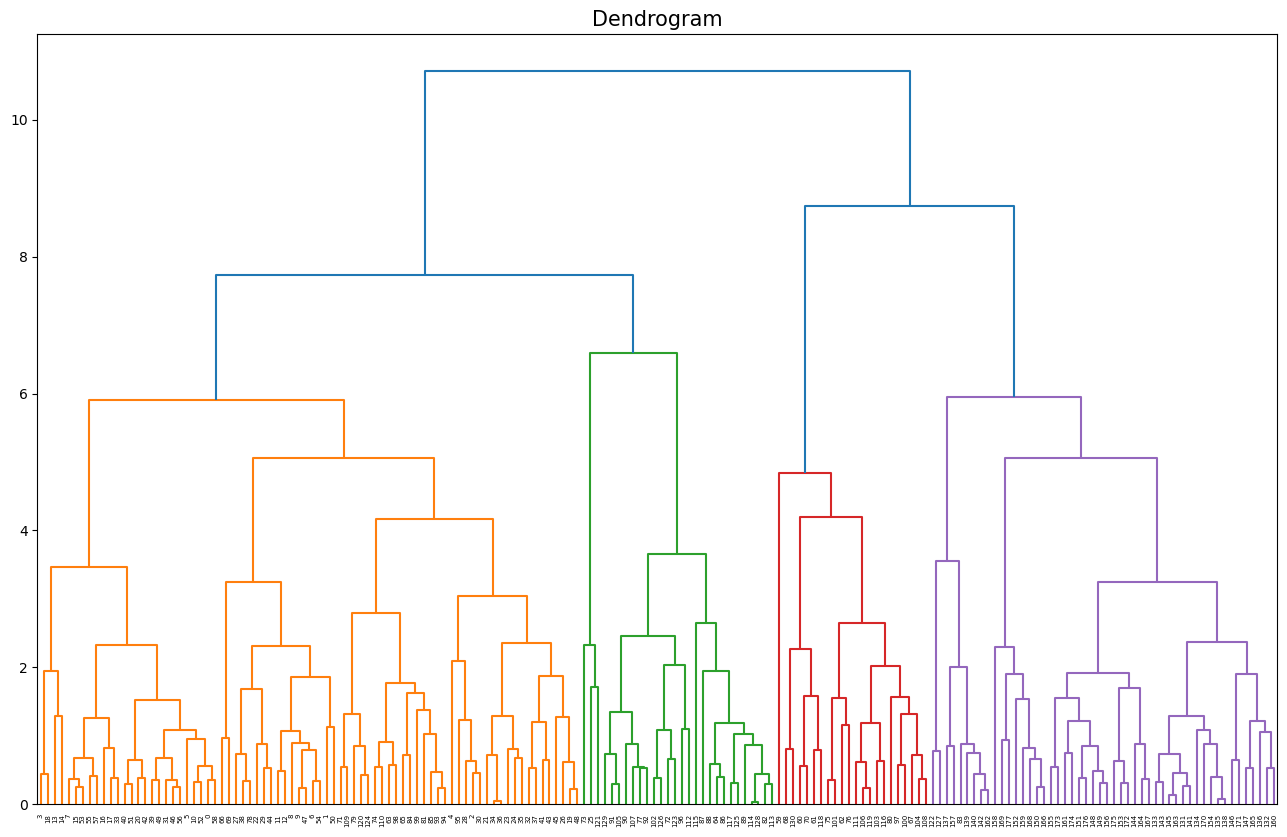

In [85]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(wine_pca, method='complete'))
plt.title("Dendrogram",size=15)

In [86]:
hc4_pc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [87]:
y_hc4p = hc4_pc.fit_predict(wine_pca)
Clusters=pd.DataFrame(y_hc4p,columns=['Clusters'])
wine_data['cluster'] = y_hc4p

In [88]:
wine_data.groupby('cluster').agg(['mean']).reset_index()

,cluster,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1.964286,12.193929,2.023571,2.449286,22.453571,94.321429,2.129643,2.066786,0.422857,1.504643,2.934643,1.050000,2.814643,503.571429
1,1,2.940000,13.115600,3.381800,2.449800,21.750000,98.480000,1.701000,0.844400,0.457800,1.190400,7.216000,0.694800,1.741800,619.020000
2,2,2.045455,12.429091,1.612727,1.984545,17.918182,91.772727,2.021818,1.668636,0.349545,1.211818,3.138636,1.044364,2.534091,522.863636
3,3,1.256410,13.377692,1.982564,2.391154,17.432051,104.743590,2.812436,2.877051,0.281923,1.985513,4.978462,1.068077,3.118333,979.397436


In [89]:
for i in range(4):
    print("cluster", i)
    print("Total Members:", len(list(wine_data[wine_data['cluster'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 28

cluster 1
Total Members: 50

cluster 2
Total Members: 22

cluster 3
Total Members: 78



## Kmeans clustering

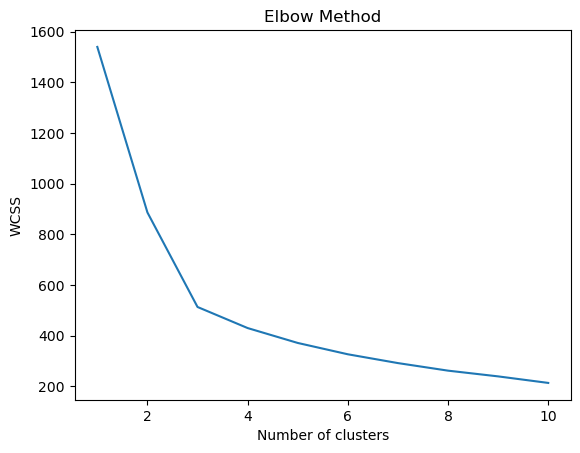

In [90]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(wine_pca)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [91]:
## Fitting the pca data to the kmeans cluster

In [92]:
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(wine_pca)

KMeans(n_clusters=3, random_state=42)

In [93]:
KM_pca_label=clusters_new.labels_

In [94]:
wine_data['cluster'] = clusters_new.labels_

In [95]:
clusters_new.cluster_centers_

array([[-2.72003575e+00, -1.12565126e+00, -2.39093241e-01],
       [ 2.27619360e+00, -9.32054027e-01,  1.52803156e-03],
       [-3.69566084e-02,  1.77223945e+00,  1.86138728e-01]])

In [96]:
wine_data.groupby('cluster').agg(['mean']).reset_index()

,cluster,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2.941176,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
1,1,1.048387,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806
2,2,2.000000,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231


In [97]:
# checking the no. of clusters in each kmeans cluster

In [98]:
for i in range(3):
    print("cluster", i)
    print("Total Members:", len(list(wine_data[wine_data['cluster'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 51

cluster 1
Total Members: 62

cluster 2
Total Members: 65



#### Silhoutte score - checking in each method and in kmeans cluster

In [99]:
SH_ward_PCA=metrics.silhouette_score(wine_pca,y_hc1p)
SH_ward_PCA

0.36310673051041414

In [100]:
SH_average_PCA=metrics.silhouette_score(wine_pca,y_hc2p)
SH_average_PCA

0.44594921980629704

In [101]:
SH_complete_PCA=metrics.silhouette_score(wine_pca,y_hc3p)
SH_complete_PCA

0.44654492780235827

In [102]:
SH_single_PCA=metrics.silhouette_score(wine_pca,y_hc4p)
SH_single_PCA

0.35784842685673063

In [103]:
SH_kmeans_PCA=metrics.silhouette_score(wine_pca,KM_pca_label)
SH_kmeans_PCA

0.4537999848257617

### Tabling the results for easy comaparison

In [104]:
t={'Model':pd.Series(['SH_average','SH_Ward','SH_Complete','SH_Single','SH_Kmeans']),
  'silhouette score':[SH_average,SH_Ward,SH_Complete,SH_Single,SH_Kmeans],
   'Model_pca':['SH_ward_PCA','SH_average_PCA','SH_complete_PCA','SH_single_PCA','SH_kmeans_PCA'],
   'PCA Silhouette score ':[SH_ward_PCA,SH_average_PCA,SH_complete_PCA,SH_single_PCA,SH_kmeans_PCA]
  }
t=pd.DataFrame(t)
t

,Model,silhouette score,Model_pca,PCA Silhouette score
0,SH_average,0.229458,SH_ward_PCA,0.363107
1,SH_Ward,0.193825,SH_average_PCA,0.445949
2,SH_Complete,0.277444,SH_complete_PCA,0.446545
3,SH_Single,0.222451,SH_single_PCA,0.357848
4,SH_Kmeans,0.284859,SH_kmeans_PCA,0.453800


## Conclusion : 
### From the above observation the silhoutte score shows the goodness in the clusters before performing the PCA is lesser than after performing PCA, means the complexity of the data decreased .Moreover Kmeans clusters and complete linkage method are giving better result.